# Estadística Aplicada

David Eduardo Gómez Marín - 194352

Grupo 41 - sesión 17

In [27]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
import yfinance as yf

plt.rcParams['figure.figsize'] = (10,6)

In [29]:
walmex = yf.download('WALMEX.MX', start = '2016-01-01', end = '2022-12-31', progress = False)

In [30]:
walmex.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,42.959999,43.299999,42.299999,42.840000,35.479031,6483179
2016-01-05,42.849998,43.900002,42.540001,42.660000,35.329956,8115974
2016-01-06,42.650002,43.020000,42.070000,42.380001,35.098068,12511056
2016-01-07,41.320000,42.240002,39.259998,39.990002,33.118729,18124494
2016-01-08,40.990002,41.490002,40.700001,41.029999,33.980045,15949791


In [31]:
walmex = walmex[['Adj Close']]

Text(0.5, 0, 'Día')

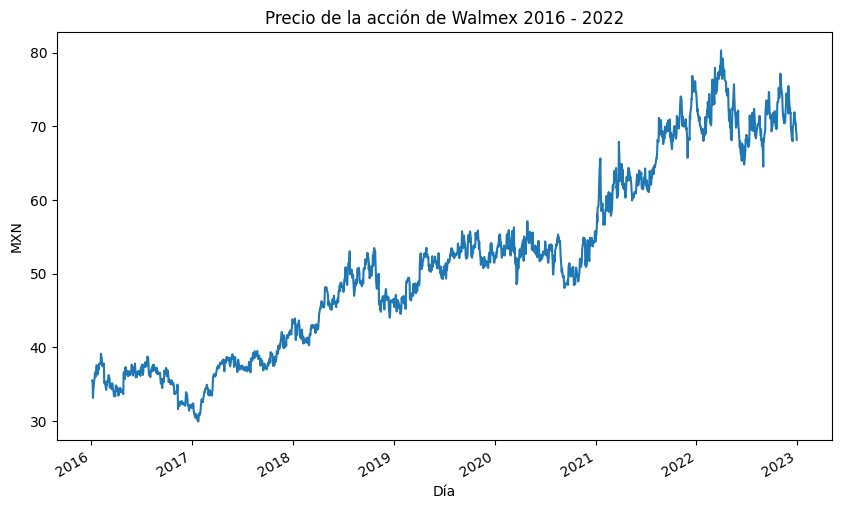

In [32]:
#Grafica
walmex['Adj Close'].plot()
plt.title('Precio de la acción de Walmex 2016 - 2022')
plt.ylabel('MXN')
plt.xlabel('Día')
#plt.xlim()

In [33]:
#Calcular PMS-10 , PMS-50

#Señal de corto plazo
walmex['PMS-10'] = walmex['Adj Close'].rolling(10).mean()

#Señal de largo plazo
walmex['PMS-50'] = walmex['Adj Close'].rolling(50).mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10632\1730461677.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmex['PMS-10'] = walmex['Adj Close'].rolling(10).mean()
C:\Users\DELL\AppData\Local\Temp\ipykernel_10632\1730461677.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmex['PMS-50'] = walmex['Adj Close'].rolling(50).mean()


In [34]:
walmex['Adj Close'].head(15)

Date
2016-01-04    35.479031
2016-01-05    35.329956
2016-01-06    35.098068
2016-01-07    33.118729
2016-01-08    33.980045
2016-01-11    35.387932
2016-01-12    35.545280
2016-01-13    35.802017
2016-01-14    36.439709
2016-01-15    36.605347
2016-01-18    36.033901
2016-01-19    37.036011
2016-01-20    37.557747
2016-01-21    37.566036
2016-01-22    36.481133
Name: Adj Close, dtype: float64

<Axes: xlabel='Date'>

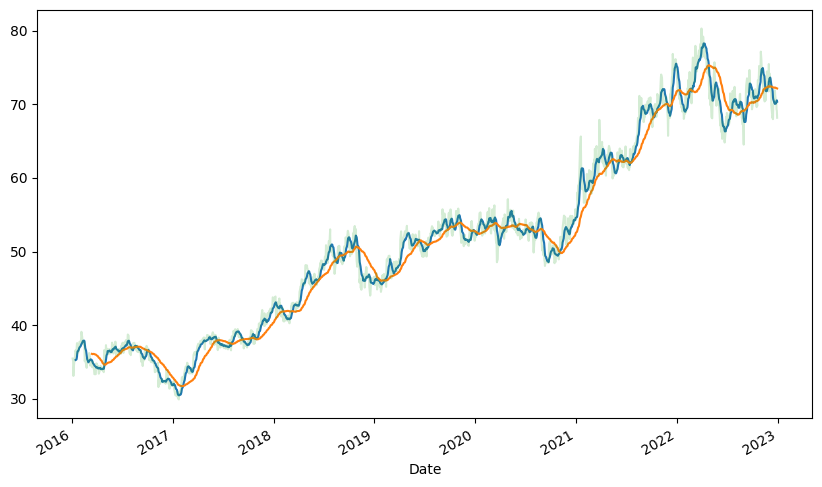

In [35]:
walmex['PMS-10'].plot()
walmex['PMS-50'].plot()

#alpha = opacidad 0%, alpha= opacidad 100%
walmex['Adj Close'].plot(alpha= 0.2)

In [36]:
##Estrategia de inversión
walmex['estrategia'] = walmex['PMS-10'] > walmex['PMS-50']

C:\Users\DELL\AppData\Local\Temp\ipykernel_10632\1355072686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmex['estrategia'] = walmex['PMS-10'] > walmex['PMS-50']


In [37]:
walmex.head()

,Adj Close,PMS-10,PMS-50,estrategia
Date,,,,
2016-01-04,35.479031,NaN,NaN,False
2016-01-05,35.329956,NaN,NaN,False
2016-01-06,35.098068,NaN,NaN,False
2016-01-07,33.118729,NaN,NaN,False
2016-01-08,33.980045,NaN,NaN,False


Retorno = $\frac{P_t - P_{t-1}}{P_{t-1}}$


Esto se hace con la función pct_change()

In [38]:
walmex['retorno'] = walmex['Adj Close'].pct_change()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10632\1870253393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmex['retorno'] = walmex['Adj Close'].pct_change()


In [39]:
walmex.head()

,Adj Close,PMS-10,PMS-50,estrategia,retorno
Date,,,,,
2016-01-04,35.479031,NaN,NaN,False,NaN
2016-01-05,35.329956,NaN,NaN,False,-0.004202
2016-01-06,35.098068,NaN,NaN,False,-0.006563
2016-01-07,33.118729,NaN,NaN,False,-0.056395
2016-01-08,33.980045,NaN,NaN,False,0.026007


<Axes: xlabel='Date'>

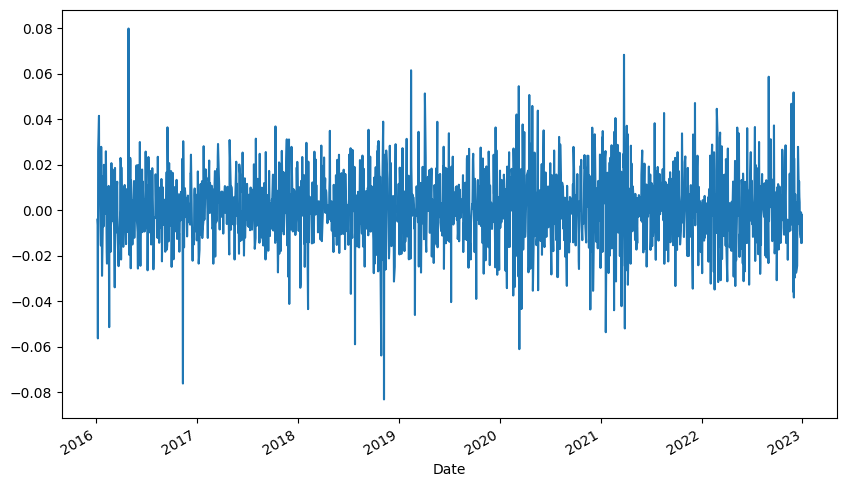

In [40]:
walmex['retorno'].plot()